# Section5 Processing missing values and outliers using pandas

## Identification of missing values

In [6]:
# Show all output at notebook
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd 

df = pd.read_csv("houseRent_missout.csv")

# View the whole data
df

# Get information of the dataframe to check if there is missing data
df.info()

# Findout where are the missing data located
df.isnull()
df.isnull().any(axis=1)

# Process the df so that only the roll with missing value is showened
df[df.isnull().any(axis=1)]

,Distance,Size,Structure,Orientation,Rent
0,850,37,Wooden,West,81000.0
1,580,16,NonWooden,South,57000.0
2,700,35,NonWooden,South,116000.0
3,950,29,Wooden,West,51000.0
4,870,36,NonWooden,South,114000.0
...,...,...,...,...,...
95,640,26,NonWooden,East,80000.0
96,500,33,NonWooden,South,113000.0
97,860,29,NonWooden,South,86000.0
98,530,26,NonWooden,NaN,97000.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Distance     100 non-null    int64  
 1   Size         100 non-null    int64  
 2   Structure    99 non-null     object 
 3   Orientation  99 non-null     object 
 4   Rent         99 non-null     float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ KB


,Distance,Size,Structure,Orientation,Rent
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,True,False


0     False
1     False
2     False
3     False
4     False
      ...  
95    False
96    False
97    False
98     True
99    False
Length: 100, dtype: bool

,Distance,Size,Structure,Orientation,Rent
21,630,28,NonWooden,South,NaN
29,790,32,NaN,East,104000.0
98,530,26,NonWooden,NaN,97000.0


## Process of missing values

In [8]:
# Remove the roll

df2 = df.dropna()
df2


,Distance,Size,Structure,Orientation,Rent
0,850,37,Wooden,West,81000.0
1,580,16,NonWooden,South,57000.0
2,700,35,NonWooden,South,116000.0
3,950,29,Wooden,West,51000.0
4,870,36,NonWooden,South,114000.0
...,...,...,...,...,...
94,570,37,NonWooden,South,131000.0
95,640,26,NonWooden,East,80000.0
96,500,33,NonWooden,South,113000.0
97,860,29,NonWooden,South,86000.0


## Identification of outliers

,Distance,Size,Rent
count,97.000000,97.000000,97.000000
mean,568.969072,29.278351,90865.979381
std,640.784813,5.971708,24456.862051
min,80.000000,2.000000,36000.000000
25%,370.000000,26.000000,71000.000000
50%,510.000000,30.000000,92000.000000
75%,650.000000,33.000000,109000.000000
max,6500.000000,40.000000,161000.000000


<Axes: >

0     False
1     False
2     False
3     False
4     False
      ...  
94    False
95    False
96    False
97    False
99    False
Name: Distance, Length: 97, dtype: bool

,Distance,Size,Structure,Orientation,Rent
70,6500,37,NonWooden,East,123000.0


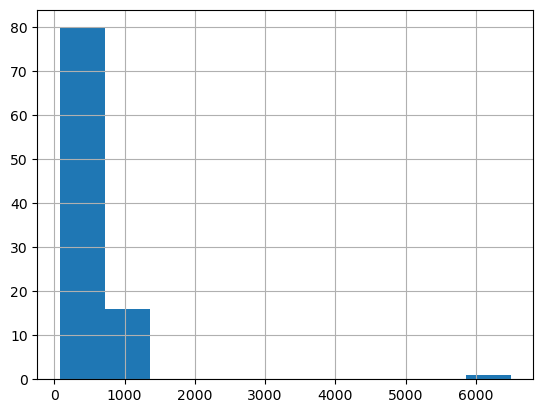

In [19]:
%matplotlib inline

df2.describe()

df2["Distance"].hist()

df2["Distance"]>2000

df2[df2["Distance"]>2000]




<Axes: >

,Distance,Size,Structure,Orientation,Rent
39,440,2,NonWooden,East,84000.0


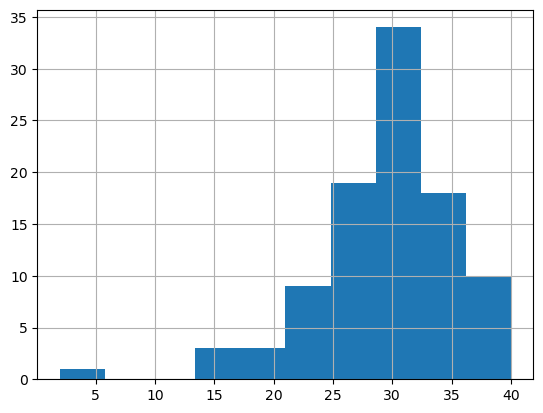

In [20]:
df2["Size"].hist()

df2[df2["Size"]<10]

## Processing of outliers

In [21]:
df3 = df2.drop([70, 39])

df3

,Distance,Size,Structure,Orientation,Rent
0,850,37,Wooden,West,81000.0
1,580,16,NonWooden,South,57000.0
2,700,35,NonWooden,South,116000.0
3,950,29,Wooden,West,51000.0
4,870,36,NonWooden,South,114000.0
...,...,...,...,...,...
94,570,37,NonWooden,South,131000.0
95,640,26,NonWooden,East,80000.0
96,500,33,NonWooden,South,113000.0
97,860,29,NonWooden,South,86000.0


In [22]:
df4 = pd.get_dummies(df3, drop_first=True)

df4

,Distance,Size,Rent,Structure_Wooden,Orientation_South,Orientation_West
0,850,37,81000.0,True,False,True
1,580,16,57000.0,False,True,False
2,700,35,116000.0,False,True,False
3,950,29,51000.0,True,False,True
4,870,36,114000.0,False,True,False
...,...,...,...,...,...,...
94,570,37,131000.0,False,True,False
95,640,26,80000.0,False,False,False
96,500,33,113000.0,False,True,False
97,860,29,86000.0,False,True,False


<Axes: xlabel='Size', ylabel='Rent'>

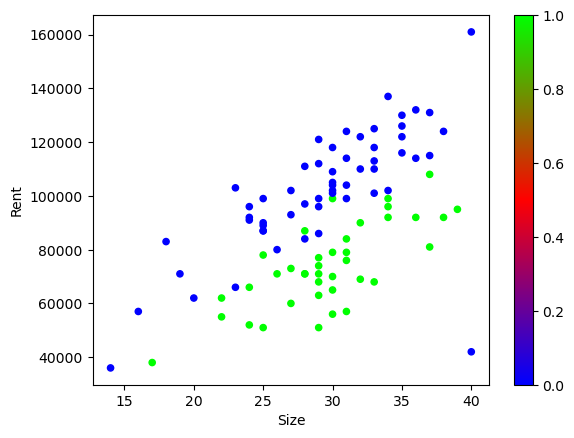

In [24]:
df4.plot(kind="scatter", x="Size", y="Rent", c=df4["Structure_Wooden"], cmap="brg")

In [27]:
df4[(df4["Size"]>30) & (df4["Rent"]<70000)]

df5 = df4.drop([56])

,Distance,Size,Rent,Structure_Wooden,Orientation_South,Orientation_West
56,510,40,42000.0,False,False,True
71,530,32,69000.0,True,False,True
84,800,33,68000.0,True,False,False
93,700,31,57000.0,True,False,True


In [31]:
import numpy as np 
from sklearn.linear_model import LinearRegression

sr_y = df5["Rent"]
df_x = df5[["Distance", "Size", "Structure_Wooden", "Orientation_South", "Orientation_West"]]

reg = LinearRegression()
reg.fit(df_x, sr_y)

print(reg.coef_)
print(reg.intercept_)
print(reg.score(df_x, sr_y))


LinearRegression()

[   -44.34635119   3094.43659557 -29195.43308549   4268.77350021
   -102.15759622]
33220.32244620519
0.9487903096364243


## Exerciese
## Identification of the missing values and outliers

In [32]:
import pandas as pd 

df = pd.read_csv("diagmissout.csv")
df

,BodyTemperature,Nausea,BackPain,NeedToUrinate,UrinaryPain,UrinaryFever,Cystitis
0,35.5,no,yes,no,no,no,no
1,35.9,no,no,yes,yes,yes,yes
2,35.9,no,yes,no,no,no,no
3,6.0,no,no,yes,yes,yes,yes
4,36.0,no,yes,no,no,no,no
...,...,...,...,...,...,...,...
115,41.4,no,yes,yes,no,yes,no
116,41.5,no,no,no,no,no,no
117,41.5,yes,yes,no,yes,no,no
118,41.5,no,yes,yes,no,yes,no


In [34]:
df.info()

df[df.isnull().any(axis=1)]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   BodyTemperature  120 non-null    float64
 1   Nausea           120 non-null    object 
 2   BackPain         120 non-null    object 
 3   NeedToUrinate    120 non-null    object 
 4   UrinaryPain      119 non-null    object 
 5   UrinaryFever     119 non-null    object 
 6   Cystitis         120 non-null    object 
dtypes: float64(1), object(6)
memory usage: 6.7+ KB


,BodyTemperature,Nausea,BackPain,NeedToUrinate,UrinaryPain,UrinaryFever,Cystitis
5,36.0,no,yes,no,NaN,no,no
35,37.3,no,no,yes,yes,NaN,yes


,BodyTemperature
count,120.000000
mean,41.309167
std,31.189664
min,6.000000
25%,37.100000
50%,38.000000
75%,40.600000
max,378.000000


<Axes: >

,BodyTemperature,Nausea,BackPain,NeedToUrinate,UrinaryPain,UrinaryFever,Cystitis
3,6.0,no,no,yes,yes,yes,yes


,BodyTemperature,Nausea,BackPain,NeedToUrinate,UrinaryPain,UrinaryFever,Cystitis
52,378.0,no,yes,no,no,no,no


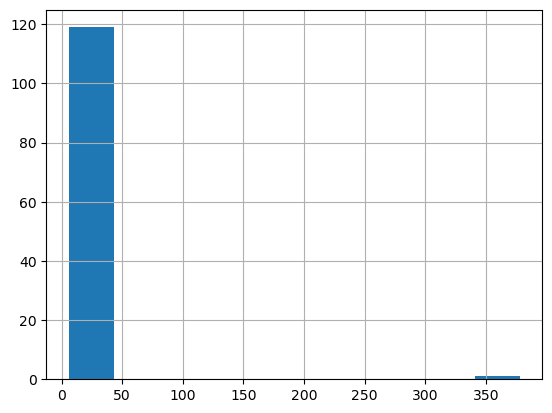

In [39]:
df.describe()

df["BodyTemperature"].hist()
df[df["BodyTemperature"]<10]
df[df["BodyTemperature"]>50]
